<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-checo0228/blob/main/EjercicioSergio_Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



In [6]:
from pandas.core.api import DataFrame
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data
df=pd.read_csv("CarPrice_Assignment.csv")


In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


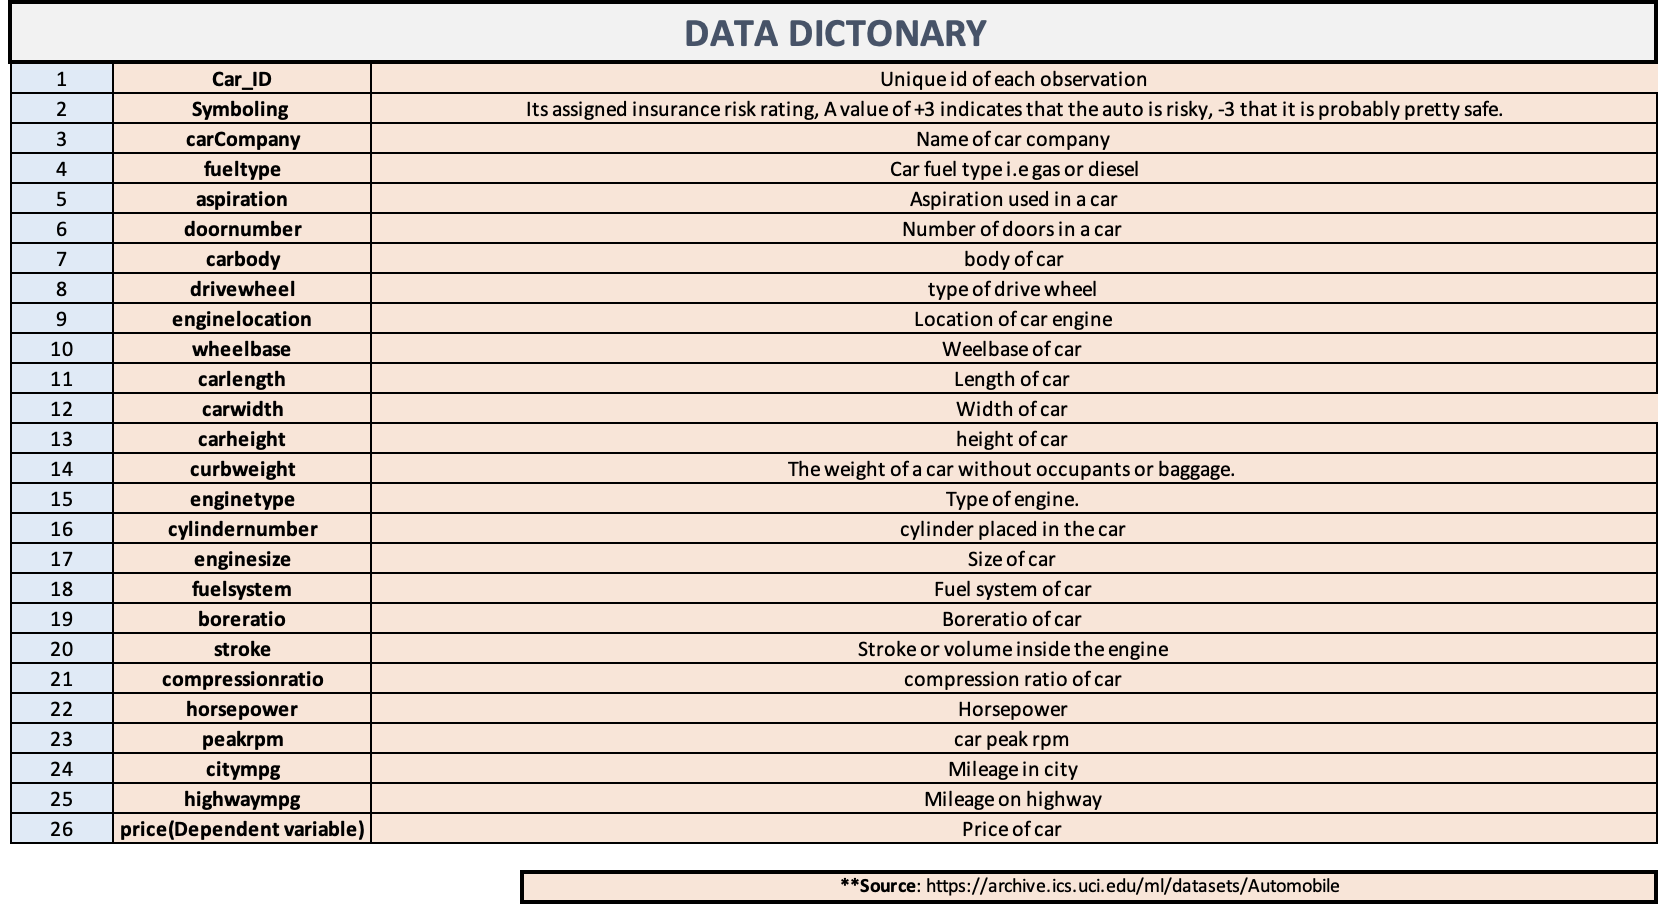

In [ ]:
Image("/content/drive/MyDrive/DCI_data/ML2023/Carprice_dictionary.png")

In [8]:
#Separate Numerical and  Categorical data

# Separar las columnas numéricas y categóricas
columnas_numericas = df.select_dtypes(include=['number'])  # Seleccionar columnas numéricas
columnas_categoricas = df.select_dtypes(exclude=['number'])  # Seleccionar columnas categóricas

# Mostrar las primeras filas de cada DataFrame
print("Columnas Numéricas:")
print(columnas_numericas.head())

print("\nColumnas Categóricas:")
print(columnas_categoricas.head())

Columnas Numéricas:
   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130       3.47    2.68               9.0         111     5000   
1         130       3.47    2.68               9.0         111     5000   
2         152       2.68    3.47               9.0         154     5000   
3         109       3.19    3.40              10.0         102     5500   
4         136       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          

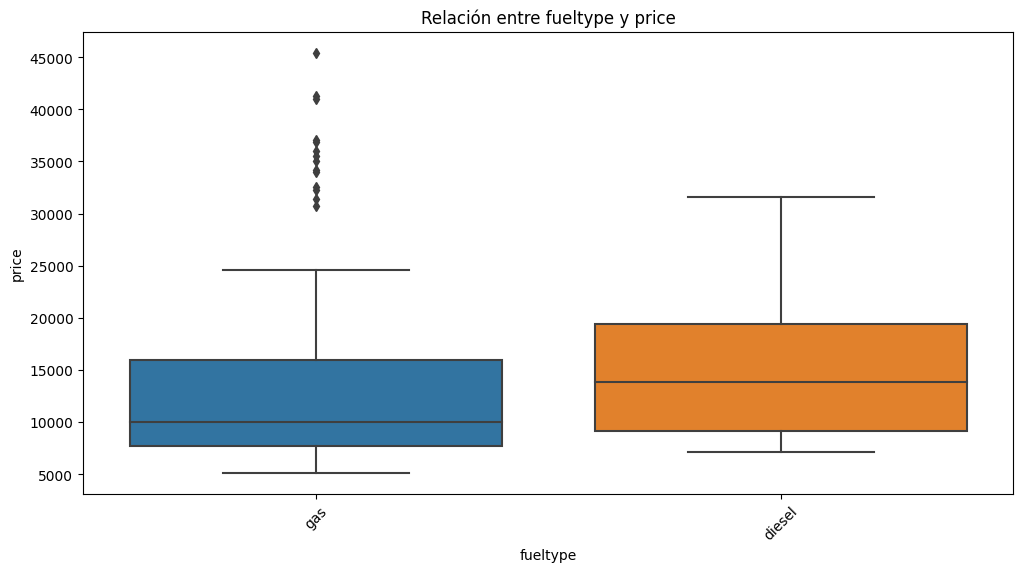

In [9]:
#Analiza la dependencia del valor del auto como función de cada variable categorica
# Visualizar la relación entre una variable categórica y el valor del auto
def plot_categorical_relationship(data, x, y='price'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=x, y=y, data=data)
    plt.xticks(rotation=45)
    plt.title(f'Relación entre {x} y {y}')
    plt.show()

# Ejemplo de cómo analizar la variable 'fueltype'
plot_categorical_relationship(df, 'fueltype')

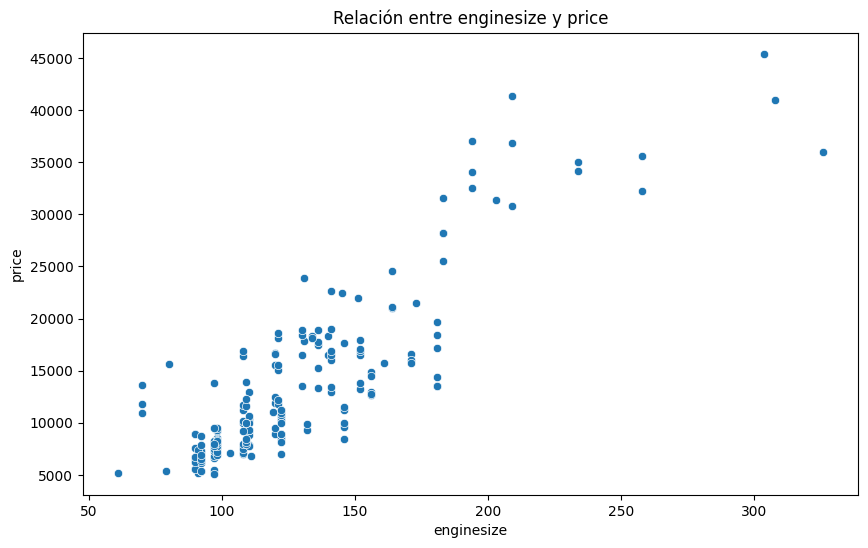

In [10]:
#Analiza la dependencia del valor del auto como función de cada variable numerica
# Visualizar la relación entre una variable numérica y el valor del auto
def plot_numeric_relationship(data, x, y='price'):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data)
    plt.title(f'Relación entre {x} y {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Ejemplo de cómo analizar la variable 'enginesize'
plot_numeric_relationship(df, 'enginesize')

In [12]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
# Definir las variables numéricas que utilizarás como características
numeric_vars = ['enginesize', 'horsepower', 'curbweight', 'carwidth', 'carlength']

# Definir las variables categóricas que deseas utilizar
categorical_vars = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel']

# Combinar las variables numéricas y categóricas seleccionadas
use_vars = numeric_vars + categorical_vars

# Seleccionar las características (variables independientes)
X = df[use_vars]

# Seleccionar la variable objetivo (variable dependiente)
y = df['price']

# Convertir las variables categóricas en variables numéricas (codificación one-hot)
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) para evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse}")

Error cuadrático medio (MSE): 15204765.128607439


In [13]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df=df[use_vars]
df=pd.get_dummies(df,columns=categorical_vars,drop_first=True)


<Axes: >

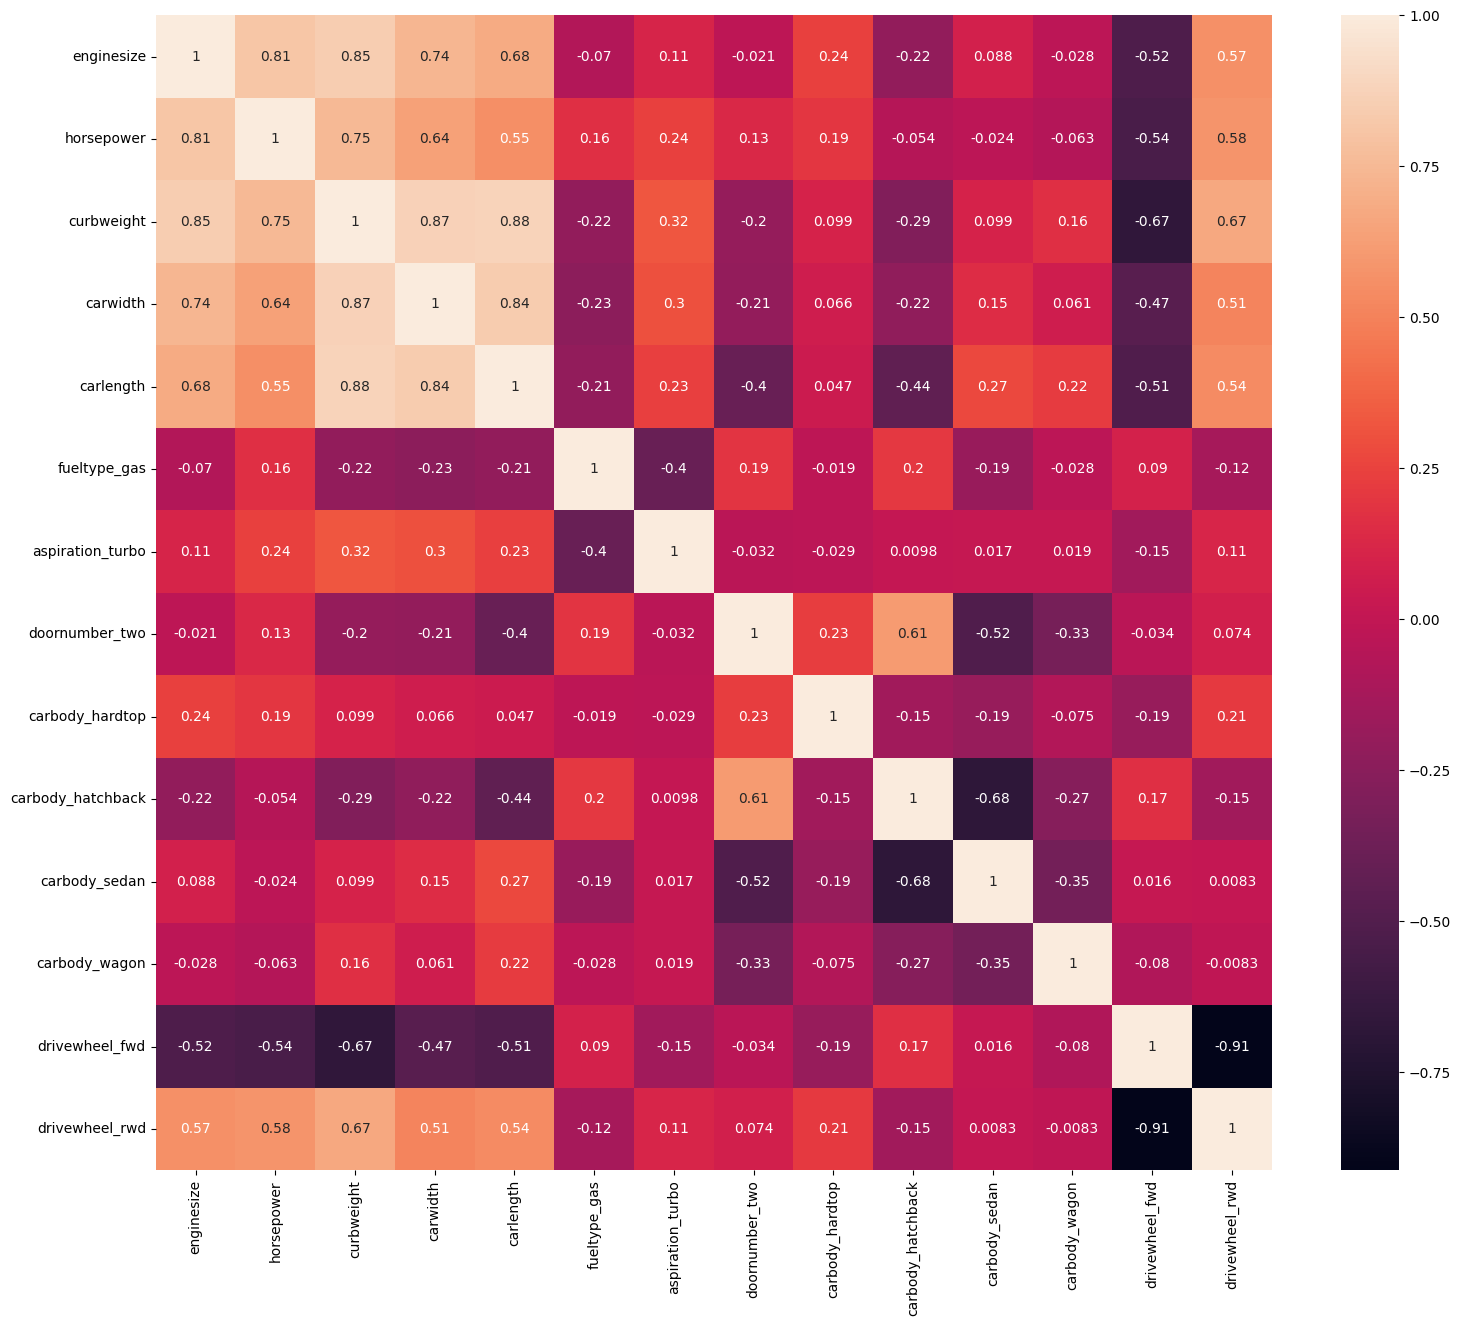

In [14]:
#Checa la correlación entre todas las variables usando un "heat map "
fig,ax=plt.subplots(1,1,figsize=(18,15))
sns.heatmap(df.corr(),annot=True)

In [34]:
#Construye la matriz de caracteristicas X y el vector de target t.
# Definir las columnas de características (X) y la columna objetivo (t o y)
X = df.drop(columns=['curbweight'])
t = df['curbweight']  # Esta es la columna objetivo que queremos predecir

# Verificar las dimensiones de X y t
print("Dimensiones de X:", X.shape)
print("Dimensiones de t:", t.shape)


#Normaliza las caracteristicas y procede a generar el modelo.
# Normalizar las características
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, t_train, t_test = train_test_split(X_normalized, t, test_size=0.2, random_state=42)

# Crear y entrenar el modelo lineal
model = LinearRegression()
model.fit(X_train, t_train)

# Realizar predicciones en el conjunto de prueba
t_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(t_test, t_pred)
r2 = r2_score(t_test, t_pred)

# Imprimir métricas
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Usa el 20% de los datos como conjunto de validación
# Dividir los datos en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de entrenamiento y validación
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de t_train:", t_train.shape)
print("Dimensiones de X_val:", X_val.shape)
print("Dimensiones de t_val:", t_val.shape)



Dimensiones de X: (205, 13)
Dimensiones de t: (205,)
Mean Squared Error (MSE): 15535.55460777987
R-squared (R2): 0.9493943041833235
Dimensiones de X_train: (164, 13)
Dimensiones de t_train: (164,)
Dimensiones de X_val: (41, 13)
Dimensiones de t_val: (41,)


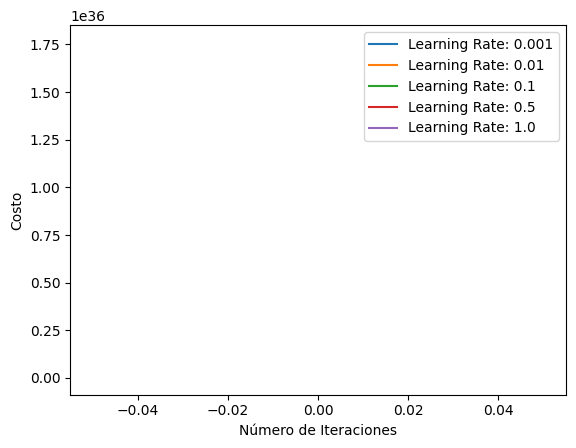

In [25]:
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
import keras
from keras.models import Sequential
from keras.layers import Dense

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2, random_state=42)

# Define una función que crea y entrena un modelo de Keras con un learning rate específico
def train_and_evaluate_model(X_train, t_train, learning_rate):
    # Crea un modelo secuencial de Keras
    model = Sequential()

    # Agrega capas al modelo
    model.add(Dense(units=1, input_dim=X_train.shape[1], activation='linear'))

    # Compila el modelo con el learning rate deseado
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=learning_rate))

    # Entrena el modelo
    history = model.fit(X_train, t_train, epochs=100, verbose=0)

    # Obtiene la historia de los valores de costo
    cost_history = history.history['loss']

    return cost_history

# Define una lista de valores de learning rate que deseas probar
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

# Inicializa una lista para almacenar los costos resultantes
costs = []

# Itera a través de los valores de learning rate y registra los costos
for learning_rate in learning_rates:
    cost_history = train_and_evaluate_model(X_train, t_train, learning_rate)
    costs.append(cost_history)

# Grafica la función de costo en función del número de iteraciones para cada valor de learning rate
for i, learning_rate in enumerate(learning_rates):
    plt.plot(costs[i], label=f'Learning Rate: {learning_rate}')

plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()



In [32]:
# Posteriormente utiliza scikit-learn para comprobar tu resultado
# Cargar el conjunto de datos desde un archivo CSV
data = pd.read_csv('CarPrice_Assignment.csv')  # Reemplaza 'CarPrice_Assignment.csv' con tu archivo de datos

# Nombres de las columnas numéricas y categóricas en base a tu conjunto de datos
numeric_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
categorical_vars = ['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']

# Crear DataFrame de características numéricas (X) y objetivo (t)
X = data[numeric_vars]
t = data['price']

# Verificar las dimensiones de X y t
print("Dimensiones de X:", X.shape)
print("Dimensiones de t:", t.shape)




Dimensiones de X: (205, 12)
Dimensiones de t: (205,)


In [28]:
print(data.head())


   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [ ]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?